### DS5220: Supervised Machine Learning and Learning Theory                                                                      (Fall 2022)

  # Problem Set 3

Submitted by: Pritish Arora (002781425)

### Problem 1 We will now perform cross-validation on a simulated data set.
numpy.random.seed(123)<br>
x = numpy.random.normal(0, 1, (200))<br>
y = x + 2 * x** 2 - 2 * x** 3 + numpy.random.normal(0, 1, (200))<br>

**(a)** Perform best subset selection in order to choose the best model containing the
polynomial features up to degree 10: X, $X^2$
, · · · , $X^{10}$. What is the best model obtained
according to Cp (AIC), BIC, and adjusted R2
? Show some plots to provide evidence for your
answer, and report the coefficients of the best model obtained. [Hint: Write a recursion to
enumerate over all possible subsets of {X, $X^2$
, . . . , $X^{10}$}.]

In [2]:
import math
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)
x = np.random.normal(0, 1, (200))
y = x + 2 * x**2 - 2 * x**3 + np.random.normal(0, 1, (200))

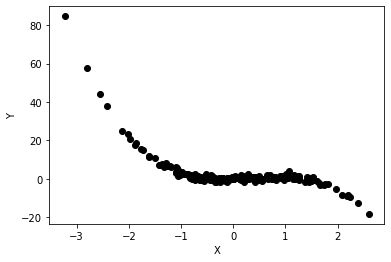

In [3]:
import matplotlib.pyplot as plt
#Plot outputs
    
plt.scatter(x, y, color="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [5]:
i=0
print(x.reshape(-1,1))

[[-1.08563060e+00]
 [ 9.97345447e-01]
 [ 2.82978498e-01]
 [-1.50629471e+00]
 [-5.78600252e-01]
 [ 1.65143654e+00]
 [-2.42667924e+00]
 [-4.28912629e-01]
 [ 1.26593626e+00]
 [-8.66740402e-01]
 [-6.78886152e-01]
 [-9.47089689e-02]
 [ 1.49138963e+00]
 [-6.38901997e-01]
 [-4.43981960e-01]
 [-4.34351276e-01]
 [ 2.20593008e+00]
 [ 2.18678609e+00]
 [ 1.00405390e+00]
 [ 3.86186399e-01]
 [ 7.37368576e-01]
 [ 1.49073203e+00]
 [-9.35833868e-01]
 [ 1.17582904e+00]
 [-1.25388067e+00]
 [-6.37751502e-01]
 [ 9.07105196e-01]
 [-1.42868070e+00]
 [-1.40068720e-01]
 [-8.61754896e-01]
 [-2.55619371e-01]
 [-2.79858911e+00]
 [-1.77153310e+00]
 [-6.99877235e-01]
 [ 9.27462432e-01]
 [-1.73635683e-01]
 [ 2.84591590e-03]
 [ 6.88222711e-01]
 [-8.79536343e-01]
 [ 2.83627324e-01]
 [-8.05366518e-01]
 [-1.72766949e+00]
 [-3.90899794e-01]
 [ 5.73805862e-01]
 [ 3.38589051e-01]
 [-1.18304945e-02]
 [ 2.39236527e+00]
 [ 4.12912160e-01]
 [ 9.78736006e-01]
 [ 2.23814334e+00]
 [-1.29408532e+00]
 [-1.03878821e+00]
 [ 1.7437122

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

def returnpolymodel():
    poly=PolynomialFeatures(degree=10, include_bias=False)
    res=poly.fit_transform(x.reshape(-1,1))
    return(res)
returnpolymodel()

array([[-1.08563060e+00,  1.17859381e+00, -1.27951751e+00, ...,
         1.92955259e+00, -2.09478134e+00,  2.27415873e+00],
       [ 9.97345447e-01,  9.94697940e-01,  9.92057461e-01, ...,
         9.78959835e-01,  9.76361134e-01,  9.73769331e-01],
       [ 2.82978498e-01,  8.00768304e-02,  2.26600212e-02, ...,
         4.11175754e-05,  1.16353897e-05,  3.29256511e-06],
       ...,
       [-1.10850721e-01,  1.22878824e-02, -1.36212062e-03, ...,
         2.27986000e-08, -2.52724125e-09,  2.80146515e-10],
       [-3.41261716e-01,  1.16459559e-01, -3.97431890e-02, ...,
         1.83950327e-04, -6.27752043e-05,  2.14227739e-05],
       [-2.17946262e-01,  4.75005732e-02, -1.03525724e-02, ...,
         5.09090978e-06, -1.10954476e-06,  2.41821132e-07]])

In [5]:
def subsets(numbers):
    if numbers == []:
        return [[]]
    x = subsets(numbers[1:])
    return x + [[numbers[0]] + y for y in x]
test = subsets(list(range(0,10))) #replace 10 with length of columns in x
print((test))

[[], [9], [8], [8, 9], [7], [7, 9], [7, 8], [7, 8, 9], [6], [6, 9], [6, 8], [6, 8, 9], [6, 7], [6, 7, 9], [6, 7, 8], [6, 7, 8, 9], [5], [5, 9], [5, 8], [5, 8, 9], [5, 7], [5, 7, 9], [5, 7, 8], [5, 7, 8, 9], [5, 6], [5, 6, 9], [5, 6, 8], [5, 6, 8, 9], [5, 6, 7], [5, 6, 7, 9], [5, 6, 7, 8], [5, 6, 7, 8, 9], [4], [4, 9], [4, 8], [4, 8, 9], [4, 7], [4, 7, 9], [4, 7, 8], [4, 7, 8, 9], [4, 6], [4, 6, 9], [4, 6, 8], [4, 6, 8, 9], [4, 6, 7], [4, 6, 7, 9], [4, 6, 7, 8], [4, 6, 7, 8, 9], [4, 5], [4, 5, 9], [4, 5, 8], [4, 5, 8, 9], [4, 5, 7], [4, 5, 7, 9], [4, 5, 7, 8], [4, 5, 7, 8, 9], [4, 5, 6], [4, 5, 6, 9], [4, 5, 6, 8], [4, 5, 6, 8, 9], [4, 5, 6, 7], [4, 5, 6, 7, 9], [4, 5, 6, 7, 8], [4, 5, 6, 7, 8, 9], [3], [3, 9], [3, 8], [3, 8, 9], [3, 7], [3, 7, 9], [3, 7, 8], [3, 7, 8, 9], [3, 6], [3, 6, 9], [3, 6, 8], [3, 6, 8, 9], [3, 6, 7], [3, 6, 7, 9], [3, 6, 7, 8], [3, 6, 7, 8, 9], [3, 5], [3, 5, 9], [3, 5, 8], [3, 5, 8, 9], [3, 5, 7], [3, 5, 7, 9], [3, 5, 7, 8], [3, 5, 7, 8, 9], [3, 5, 6], [3, 5,

In [41]:
import statsmodels.api as sm
polyres = returnpolymodel()
res_model_list = list()
for i in range(0,len(test)):
    X = sm.add_constant(polyres[:,test[i]])
    model = sm.OLS(y, X)
    result = model.fit()
    res_model_list.append([test[i],result.rsquared_adj,result.aic,result.bic,result.params])
maxrsq = max(res_model_list, key=lambda sublist: sublist[1])
minaic = min(res_model_list, key=lambda sublist: sublist[2])
minbic = min(res_model_list, key=lambda sublist: sublist[3])
print("Subset with Maximum Adjusted R_sq:{0} , Adj_R_sq: {1}".format(maxrsq[0], maxrsq[1]))
print("Subset with Minimum AIC:{0} , AIC: {1}".format(minaic[0],minaic[2]))
print("Subset with Minimum BIC:{0} , BIC: {1}".format(minbic[0],minbic[3]))
print("Hence Best Model : ",minaic[0])
print("Coef for this model: ",minaic[4])

Subset with Maximum Adjusted R_sq:[0, 1, 2] , Adj_R_sq: 0.990235945776312
Subset with Minimum AIC:[0, 1, 2] , AIC: 542.2751047947545
Subset with Minimum BIC:[0, 1, 2] , BIC: 555.4683742609467
Hence Best Model :  [0, 1, 2]
Coef for this model:  [-0.18115572  0.91457218  2.06305955 -1.97085806]


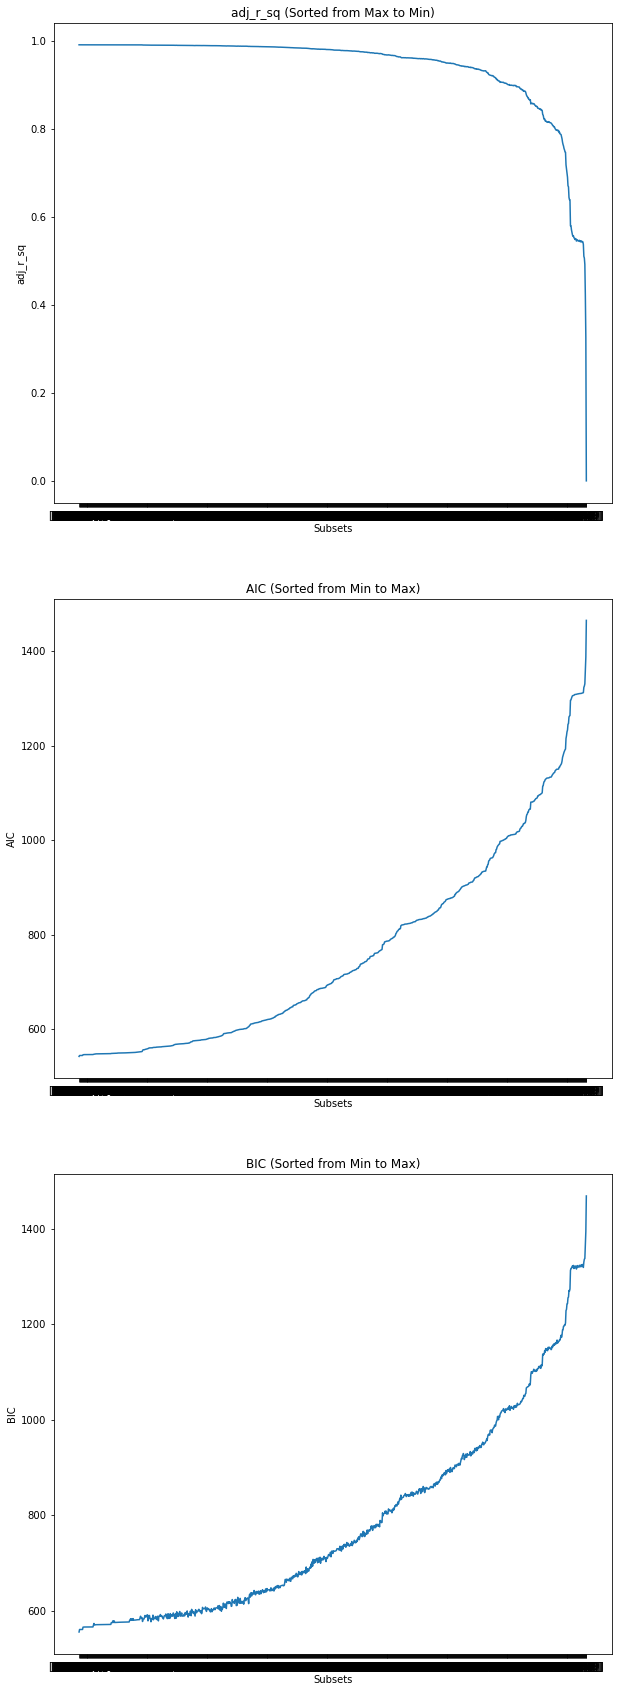

In [36]:
#sorting for plots
res_sort_list = sorted(res_model_list, key=lambda x: x[2])
# makings lists for plots of AIC, BIC, adj_R_sq
subst = []
adj_r_sq = []
aic = []
bic = []
for st in res_sort_list:
    subst.append(str(st[0]))
    adj_r_sq.append(st[1])
    aic.append(st[2])
    bic.append(st[3])
    
fig, ax = plt.subplots(3, figsize=(10, 30))

#plt.subplot(3, 1, 1)
ax[0].title.set_text('adj_r_sq (Sorted from Max to Min)')
ax[0].set_xlabel('Subsets')
ax[0].set_ylabel('adj_r_sq')
ax[0].plot(subst,adj_r_sq)
#plt.subplot(3, 1, 2)
ax[1].title.set_text('AIC (Sorted from Min to Max)')
ax[1].set_xlabel('Subsets')
ax[1].set_ylabel('AIC')
ax[1].plot(subst,aic)
#plt.subplot(3, 1, 3)
ax[2].title.set_text('BIC (Sorted from Min to Max)')
ax[2].set_xlabel('Subsets')
ax[2].set_ylabel('BIC')
ax[2].plot(subst,bic)
plt.show()



**(b)** Perform subset selection using forward stepwise selection. How does your answer
compare to the results in (a)? [Hint: Write a (double) for loop to implement the forward
stepwise rule.]

In [84]:
#forward stepwise selection
def forward_step_selection(metric):
    polyres = returnpolymodel()
    df = pd.DataFrame(polyres)
    #display(df)
    columnList = list(df.columns)
    listofmodels = list()
    best_f = list()
    threshold = 0.001
    selectedfeature = list()
    max_score= 0.0
    min_score_aic_bic = float('inf')

    for i in range(len(columnList)):
        for j in range(len(columnList)):
            SelCol= best_f + [j]
            temp = df[SelCol]
            X = sm.add_constant(temp)
            model = sm.OLS(y, X).fit()
            if (str(metric) == 'rsquared_adj'):
                score = model.rsquared_adj
                update_crt = score > max_score
                stop_creterion = abs(score-max_score) > threshold
                
                if(update_crt and stop_creterion):
                    best_feat_iter = SelCol
                    max_score = score
                
            if (str(metric) == 'aic'):
                score = model.aic
                stop_creterion = abs(score-max_score) > threshold
                update_crt = score < min_score_aic_bic
                
                if(update_crt and stop_creterion):
                    best_feat_iter = SelCol
                    min_score_aic_bic = score
                
            if (str(metric) == 'bic'):
                score = model.bic
                stop_creterion = abs(score-max_score) > threshold
                update_crt = score < min_score_aic_bic
                
                if(update_crt and stop_creterion):
                    best_feat_iter = SelCol
                    min_score_aic_bic = score
            
        best_f = best_feat_iter
    print("Best Features from forward stepwise based on {0}: {1} ".format( metric,best_f))

forward_step_selection('rsquared_adj')
forward_step_selection('aic')
forward_step_selection('bic')

Best Features from forward stepwise based on rsquared_adj: [4, 1, 2, 0] 
Best Features from forward stepwise based on aic: [4, 1, 2, 0] 
Best Features from forward stepwise based on bic: [4, 1, 2, 0] 


Here [4,1,2,0] corresponds to features $X^5,X^2,X^3,X^1$

In comparison to part (a), where we performed best subset selection and iterated through all possible subsets, Forward stepwise
selection is a greedy approach that looks for the best possible feature at every iteration and builds up to a solution. Here the threshhold param is set to 0.001, which is the terminating condition. As when the difference between the new calculated adj_r_sq  and the previously max r_sq is as insignificant as 0.001 then the algorithm should terminate.

Although best subset selection gave us a more accurate result but forward stepwise selection is computaionally more expensive, so there is a trade off between the two approaches.

**(c)** Fit a linear regression with lasso regularization model to the simulated data set,
again using X, X2
, · · · , X10 as the predictors. Use cross-validation to select the optimal value
of λ. Create plots of the cross-validation error as a function of λ. Report the coefficient
estimates using the optimal λ on the entire data, and discuss the results obtained. [Hint:
You may find sklearn.linear_model.Lasso useful.]


In [ ]:
np.random.seed(123)
x = np.random.normal(0, 1, (200))
y = x + 2 * x**2 - 2 * x**3 + np.random.normal(0, 1, (200))

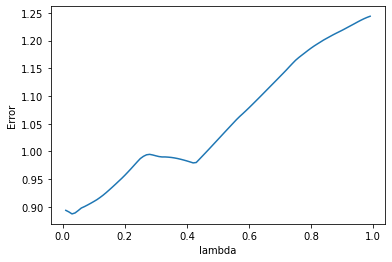

Error is min when lambda =  0.03


In [124]:
from sklearn import linear_model
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
polyres = returnpolymodel()
df = pd.DataFrame(polyres)
list_rmse=list()
alphas = list()
errors = list()
for alpha in np.arange(0.01, 1.0, 0.01):
    model = linear_model.Lasso(alpha = alpha)
    
    scrs = cross_val_score(model, df, y, scoring='neg_mean_absolute_error',
                         cv=10, n_jobs=-1)
    rmse = sqrt(mean(absolute(scrs)))
    #rmse = 1 - mean(scrs)
    #neg_mean_absolute_error
    #print("RMSE for alpha "+str(alpha)+" = "+str(rmse))
    list_rmse.append([alpha,rmse])
    alphas.append(alpha)
    errors.append(rmse)
    
plt.plot(alphas,errors)
plt.xlabel("lambda")
plt.ylabel("Error")
plt.show()
lamb = min(list_rmse, key=lambda sublist: sublist[1])

print("Error is min when lambda = ", lamb[0])
        

In [125]:
#fitting lasso with Lambda  = 0.03

model = linear_model.Lasso(0.03)
model.fit(df,y)
y_predicted = model.predict(df)

print("Coeficients of lasso: ",model.coef_)
print("Intercept of lasso: ",model.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
import math
# The root mean squared error
print("Root Mean squared error: %.2f" % math.sqrt(mean_squared_error(y, y_predicted)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_predicted))

Coeficients of lasso:  [ 3.91184882e-01  1.82836272e+00 -1.49481529e+00  9.99669017e-02
 -9.60460859e-02 -1.57925301e-02  1.87542295e-03  2.68770989e-04
  5.17111338e-04  1.08114453e-04]
Intercept of lasso:  -0.10588178720460073
Root Mean squared error: 0.93
Coefficient of determination: 0.99


C:\Users\priti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+02, tolerance: 1.761e+00
  model = cd_fast.enet_coordinate_descent(


### Problem 2
This question is based on the Medical Insurance Cost data set. This
data set has statistics about the medical insurance charges based on a set of factors such as region,
number of children and other features. You can find the description of this data set at here. We
will now try to predict the medical insurance charges using all variables.

**(a)**  Split the data into a training set and a test set with 80% observations randomly
assigned to the training set and the rest 20% observations assigned to the test set.


In [126]:
insurance_data = pd.read_csv('F:\DS5220 - SML\PS3 solution\HIC.csv')

In [127]:
insurance_data = pd.get_dummies(insurance_data)

In [128]:
insurance_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [129]:
#removing columns with duplicate columns
insurance_data = insurance_data.drop(['sex_female','smoker_no'], axis=1)

In [130]:
#renaming columns
insurance_data =  insurance_data.rename(columns={'sex_male':'sex','smoker_yes':'smoker'})

In [131]:
y = insurance_data[['charges']]
feature_list = insurance_data.columns.difference(['charges'])
x = insurance_data[feature_list]

In [132]:
insurance_data.corr()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.143527,-0.061076,0.299692,-0.152745,0.026564,-0.022251,0.097243,0.048156,-0.128457
bmi,0.143527,1.000000,-0.041996,0.211325,-0.011215,0.045921,-0.037514,0.014488,0.070051,-0.051727
children,-0.061076,-0.041996,1.000000,-0.075089,0.147182,-0.183507,-0.078339,-0.087854,0.068287,0.095720
charges,0.299692,0.211325,-0.075089,1.000000,0.092703,0.777175,0.112336,-0.043049,0.050719,-0.122019
sex,-0.152745,-0.011215,0.147182,0.092703,1.000000,0.078318,0.106223,-0.180701,0.001615,0.077158
smoker,0.026564,0.045921,-0.183507,0.777175,0.078318,1.000000,0.056199,-0.034372,0.048327,-0.072273
region_northeast,-0.022251,-0.037514,-0.078339,0.112336,0.106223,0.056199,1.000000,-0.319576,-0.345378,-0.305286
region_northwest,0.097243,0.014488,-0.087854,-0.043049,-0.180701,-0.034372,-0.319576,1.000000,-0.362102,-0.320068
region_southeast,0.048156,0.070051,0.068287,0.050719,0.001615,0.048327,-0.345378,-0.362102,1.000000,-0.345910
region_southwest,-0.128457,-0.051727,0.095720,-0.122019,0.077158,-0.072273,-0.305286,-0.320068,-0.345910,1.000000


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train, x_test,y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)

In [149]:
x_train.drop(['region_southwest'],axis=1)

,age,bmi,children,region_northeast,region_northwest,region_southeast,sex,smoker
3210,41.479573,29.000970,5,0,0,1,0,0
1569,36.103725,23.694068,2,1,0,0,0,0
920,58.000000,36.480000,0,0,1,0,0,0
2498,56.000000,36.179587,2,0,1,0,0,0
2556,20.000000,35.625000,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...
1891,34.298926,29.718303,1,0,0,0,1,0
2290,22.000000,33.770000,0,0,0,1,1,0
2775,22.852329,32.951269,4,0,0,0,0,0
3,37.000000,30.676891,3,1,0,0,1,0


In [150]:
x_train

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex,smoker
3210,41.479573,29.000970,5,0,0,1,0,0,0
1569,36.103725,23.694068,2,1,0,0,0,0,0
920,58.000000,36.480000,0,0,1,0,0,0,0
2498,56.000000,36.179587,2,0,1,0,0,0,0
2556,20.000000,35.625000,3,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
1891,34.298926,29.718303,1,0,0,0,1,1,0
2290,22.000000,33.770000,0,0,0,1,0,1,0
2775,22.852329,32.951269,4,0,0,0,1,0,0
3,37.000000,30.676891,3,1,0,0,0,1,0


**(b)** Fit a linear model using least squares on the training set, and report the test error
obtained.

In [151]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [152]:
y_pred = model.predict(x_train)

In [153]:
from sklearn.metrics import mean_squared_error, r2_score
import math
# The root mean squared error
print("Root Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_train, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))

Root Mean squared error: 5662.05
Coefficient of determination: 0.72


In [154]:
y_pred_test = model.predict(x_test)

In [155]:
from sklearn.metrics import mean_squared_error, r2_score
import math
# The root mean squared error
print("Root Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, y_pred_test)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))

Root Mean squared error: 5820.67
Coefficient of determination: 0.70


**(c)** Fit a ridge regression model on the training set, with λ chosen by cross-validation.
Report the test error obtained. [Hint: You may find sklearn.linear_model.Ridge useful.]


In [164]:
from sklearn import linear_model
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV

alphas =[i for i in np.arange(0.1, 1.0, 0.1)]
# print(alphas)
ridge=RidgeCV(alphas=alphas, store_cv_values=True)
model=ridge.fit(x_train,y_train)    
print("Best values of lambda = ",model.alpha_)
#y_pred = model.predict()


Best values of lambda =  0.30000000000000004


In [166]:
#fitting ridge with Lambda  = 0.3
from sklearn.linear_model import Ridge

model = linear_model.Ridge(0.3)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

print("Coeficients of ridge: ",model.coef_)
print("Intercept of ridge: ",model.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
import math
# The root mean squared error
print("Root Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, y_predicted)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predicted))

Coeficients of ridge:  [[  238.36249203   285.68839817   543.11624645  1476.72741673
   -478.69455241  -314.39411919  -683.63874512  1228.25147218
  22882.40318921]]
Intercept of ridge:  [-10766.0001605]
Root Mean squared error: 5820.66
Coefficient of determination: 0.70


**(d)** Fit a lasso regression model on the training set, with λ chosen by cross-validation.
Report the test error obtained, along with the number of non-zero coefficient estimates. [Hint:
You may find sklearn.linear_model.Lasso().]

In [186]:
from sklearn import linear_model
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV

alphas =[i for i in np.arange(0.1, 1.0, 0.1)]
# print(alphas)
lasso=LassoCV(alphas=alphas)
model=lasso.fit(x_train,y_train.values.flatten())    
print("Best values of lambda after CV= ",model.alpha_)
#y_pred = model.predict()


Best values of lambda after CV=  0.9


In [173]:
#fitting lasso with Lambda  = 0.9
from sklearn.linear_model import Lasso

model = linear_model.Lasso(0.9)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

print("Coeficients of ridge: ",model.coef_)
print("Intercept of ridge: ",model.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
import math
# The root mean squared error
print("Root Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, y_predicted)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predicted))

Coeficients of ridge:  [  238.3482434    285.65273115   543.42096769  1950.47392042
    -0.           158.41257256  -203.14346062  1224.55222143
 22894.84513747]
Intercept of ridge:  [-11241.3253295]
Root Mean squared error: 5820.78
Coefficient of determination: 0.70


**(e)** Fit a principal component regression model on the training set, with M chosen
by cross-validation. Report the test error obtained, along with the value of M selected by
cross-validation. [Hint: First apply sklearn.decomposition.PCA to the data set, then fit a
linear regression model.]


In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

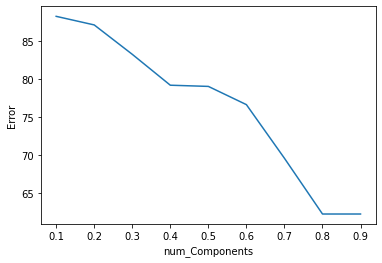

Error is min when number of PCA Components =  8


In [179]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca = PCA()
c=[]
errors = []
list_rmse=[]
for i in range(1,10):
    
    pca = PCA(n_components = i)
    X_pca = pca.fit_transform(X_train)
    model = LinearRegression()
    scrs = cross_val_score(model, X_pca, y_train, scoring='neg_mean_absolute_error',
                         cv=10, n_jobs=-1)
    rmse = sqrt(mean(absolute(scrs)))
    list_rmse.append([i,rmse])
    c.append(i)
    errors.append(rmse)
    
plt.plot(alphas,errors)
plt.xlabel("num_Components")
plt.ylabel("Error")
plt.show()
lamb = min(list_rmse, key=lambda sublist: sublist[1])

print("Error is min when number of PCA Components = ", lamb[0])
    


In [184]:
pca = PCA(n_components = 8)
X_pca = pca.fit_transform(X_train)
lrg = LinearRegression()
model = lrg.fit(X_pca,y_train) 

In [185]:
X_pca_test = pca.transform(X_test)
pred_y_pca = lrg.predict(X_pca_test)
# The root mean squared error
print("Root Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, pred_y_pca)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_y_pca))

# clf = model.fit(x_train,y_train)
# y_pred1 = model.predict(x_test)
# print(clf.best_estimator_)
# # The root mean squared error
# print("Mean squared error: %.2f" % (mean_squared_error(y_test, y_pred1)))


Root Mean squared error: 5820.67
Coefficient of determination: 0.70


**(f)** Fit a partial least squares model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by crossvalidation. [Hint: You may find sklearn.cross_decomposition.PLSRegression useful.]


In [ ]:
#PLS
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X, Y)
PLSRegression()
Y_pred = pls2.predict(X)

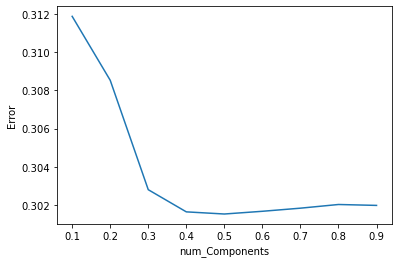

Error is min when number of PLS Components =  5


In [300]:
from sklearn.cross_decomposition import PLSRegression

c=[]
errors = []
list_rmse=[]
for i in range(1,10):
    
    pls2 = PLSRegression(n_components=i)
    scrs = cross_val_score(pls2, x_train ,y_train, scoring='neg_mean_absolute_error',
                         cv=10, n_jobs=-1)
    rmse = sqrt(mean(absolute(scrs)))
    list_rmse.append([i,rmse])
    c.append(i)
    errors.append(rmse)
    
plt.plot(alphas,errors)
plt.xlabel("num_Components")
plt.ylabel("Error")
plt.show()
lamb = min(list_rmse, key=lambda sublist: sublist[1])

print("Error is min when number of PLS Components = ", lamb[0])
    


In [192]:
pls = PLSRegression(n_components=5)
model = pls.fit(x_train,y_train)
pred_y_pls = pls.predict(x_test)
# The root mean squared error
print("Root Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, pred_y_pls)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_y_pls))


Root Mean squared error: 5820.60
Coefficient of determination: 0.70


### Problem 3
This question is based on the College data set. This data set has
statistics for a large number of US Colleges from the 1995 issue of US News and World Report.
You can find the description of this data set at https://rdrr.io/cran/ISLR/man/College.html.
Let us first create a variable of acceptance rate, Accept.Rate, that is the number of applications
accepted (Accept) divided by the number of applications received (Apps). We will now try to
predict the acceptance rate using all variables other than Accept and Apps. We can remove Accept
and Apps from the data frame. The data set can be downloaded here.


In [3]:
college_data = pd.read_csv('F:\DS5220 - SML\PS3 solution\College.csv')

In [4]:
display(college_data)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [5]:
college_data.rename(columns={'Unnamed: 0':'College_name'},inplace = True)

In [6]:
resdf = college_data.assign(acceptance_rate = lambda x : college_data['Accept']/college_data['Apps'])

In [7]:
y = resdf[['acceptance_rate']]
x = resdf.drop(['Apps','Accept','acceptance_rate','College_name'], axis=1)

In [8]:
x['Private'].replace(['Yes', 'No'],[1, 0], inplace=True)

**(a)** Split the data into a training set and a test set with 80% observations in the
training set and 20% observations in the test set.

In [9]:
x_train, x_test,y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)

In [10]:
x_train

,Private,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
29,1,497,36,69,1950,38,13353,4173,540,821,78,83,12.7,40,9220,71
465,0,1742,15,37,8077,472,6684,4110,500,900,73,83,19.6,9,4519,62
244,1,307,20,40,945,1,13218,4773,660,600,95,97,13.3,53,12263,69
709,1,653,53,87,2164,77,18920,5950,600,800,90,98,9.7,39,17089,90
292,1,408,44,75,1445,1,19240,3690,750,480,95,95,11.1,46,14067,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,1,601,62,93,2110,95,12240,5150,500,490,94,96,9.6,20,14703,93
402,1,375,24,46,1115,70,13240,3914,600,800,73,85,13.4,27,9333,73
743,0,2738,24,53,15739,4278,6940,4100,500,1700,80,84,24.7,11,5983,55
17,1,423,19,40,1819,281,10100,3520,550,1100,48,61,12.1,14,7994,59


**(b)** Fit a regression tree to the training set. Plot the tree, and interpret the results.
What test MSE do you obtain? (Hint: You may find DecisionTreeRegressor() in the
sklearn.tree library, plot_tree() in sklearn.tree() useful.)


In [212]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
model = regressor.fit(x_train,y_train)
y_pred = model.predict(x_test)

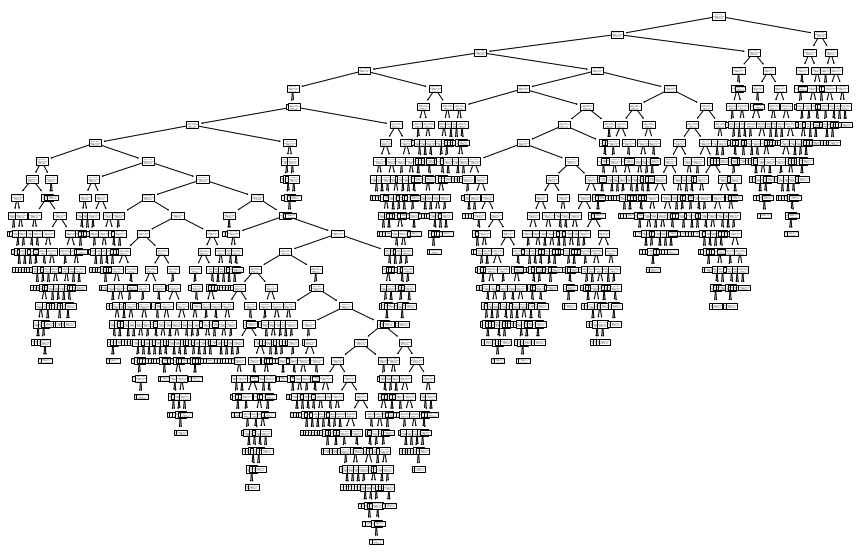

In [213]:
#Plot tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
from sklearn import tree
tree.plot_tree(model)
plt.show()

In [204]:
from sklearn.metrics import mean_squared_error, r2_score
import math
# The root mean squared error
print("Mean squared error: %.10f" % (mean_squared_error(y_test, y_pred)))

Mean squared error: 0.0213825340
Coefficient of determination: 0.10


Interpretation:<br>
Since we did not tune any parameters for the tree in this problem so the tree is dense and fully grown. In this case the tree splits till a very atomic level i.e it takes into account all the paramter and their possible value splits at various levels. This might result into overfitting, by defining the parameters like max_depth and split conditions we can obtain a more simpler and optimized tree.

**(c)** Use cross-validation in order to determine the optimal depth of tree max_depth.
Similarly, select the minimum number of samples for a split min_samples_split and for a leaf
min_samples_leaf using cross-validation. Does selecting these parameters in the regression
tree improve the test MSE? Plot the tree again and compare it to the plot from Step (b).


In [206]:
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor(random_state=0)
parameters = {'max_depth':[i for i in range(1,11)], 'min_samples_split':[i for i in range(2,11)] , 'min_samples_leaf':[i for i in range(1,21)]}
model = GridSearchCV(regressor, parameters)
clf = model.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [208]:
regressor = DecisionTreeRegressor(random_state=0, max_depth = 5, min_samples_leaf = 9, min_samples_split = 2)
model = regressor.fit(x_train,y_train)
y_pred1 = model.predict(x_test)
# The root mean squared error
print("Mean squared error: ",(mean_squared_error(y_test, y_pred1)))


Mean squared error:  0.015206333896403116


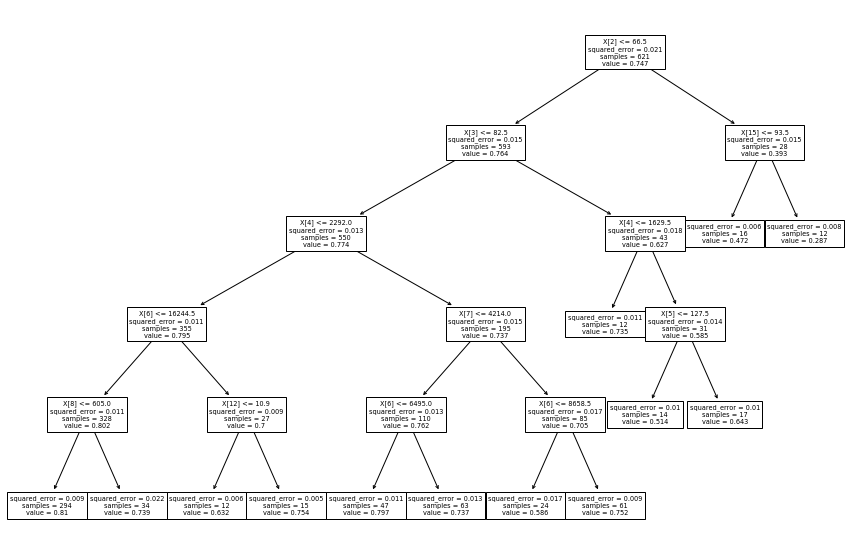

In [210]:
#Plot tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
from sklearn import tree
tree.plot_tree(model)
plt.show()

It can be observed from the results of part (a) and (b) that after tuning the hyperparameters using cross validation the resultant tree is much more simpler and hence more interpretable and also has a lower mean squared error.

**(d)** Use the bagging approach in order to analyze this data. What test MSE do
you obtain? Use the feature_importances_() attribute in DecisionTreeRegressor() to
identify which variables are most important. (Hint: You may find BaggingRegressor() in
sklearn.ensemble library useful.)

In [228]:
from sklearn.ensemble import BaggingRegressor

regressor = DecisionTreeRegressor(random_state=0)
decregr = BaggingRegressor(regressor,n_estimators=20)
model = decregr.fit(x_train,y_train.values.ravel())
y_pred2 = model.predict(x_test)
# The root mean squared error
print("Mean squared error:" ,(mean_squared_error(y_test, y_pred2)))


Mean squared error: 0.015559329928496953


In [216]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_
], axis=0)
feature_importances

array([0.00290982, 0.02876361, 0.18875971, 0.21087646, 0.05774407,
       0.03408217, 0.09807249, 0.0571883 , 0.04364164, 0.03820851,
       0.02953481, 0.02684511, 0.04454304, 0.02839163, 0.03779889,
       0.07263975])

In [221]:
importance_df = pd.DataFrame(feature_importances)
importance_df.columns = ["Feature Importances"]
importance_df["Features"] = list(x_train.columns)
importance_df = importance_df[["Features","Feature Importances"]]
importance_df = importance_df.sort_values(["Feature Importances"],ascending=False)
display(importance_df)

,Features,Feature Importances
3,Top25perc,0.210876
2,Top10perc,0.188760
6,Outstate,0.098072
15,Grad.Rate,0.072640
4,F.Undergrad,0.057744
7,Room.Board,0.057188
12,S.F.Ratio,0.044543
8,Books,0.043642
9,Personal,0.038209
14,Expend,0.037799


**(e)**  Use random forests to analyze this data. What test MSE do you obtain? Use the
importance() function to determine which variables are most important. Describe the effect
of number of trees m as well as the number of variables considered at each split, on the error
rate obtained. (Hint: You may find RandomForestRegressor() in the sklearn.ensemble
library useful. You may use the n_estimators parameter to change the number of trees. You
may use the max_features parameter to change the number of features considered at each
split.)

In [13]:
from sklearn.ensemble import RandomForestRegressor
metric_df = {}
metric_df["est"] = []
metric_df["max_features"] = []
metric_df["error"] = []
for estimators in [1,20,50,100,150,200,300]:
    for max_feat in range(1,x_train.shape[1] + 1):
        rfr = RandomForestRegressor(n_estimators=estimators, max_features = max_feat)
        rfr.fit(x_train,y_train.values.flatten())
        y_pred = rfr.predict(x_test)
        error = mean_squared_error(y_test, y_pred, squared=True)
        metric_df["est"].append(estimators)
        metric_df["max_features"].append(max_feat)
        metric_df["error"].append(error)
metric_df = pd.DataFrame(metric_df)
metric_df

,est,max_features,error
0,1,1,0.028972
1,1,2,0.021320
2,1,3,0.025039
3,1,4,0.025149
4,1,5,0.027975
...,...,...,...
107,300,12,0.012142
108,300,13,0.011990
109,300,14,0.011956
110,300,15,0.012058


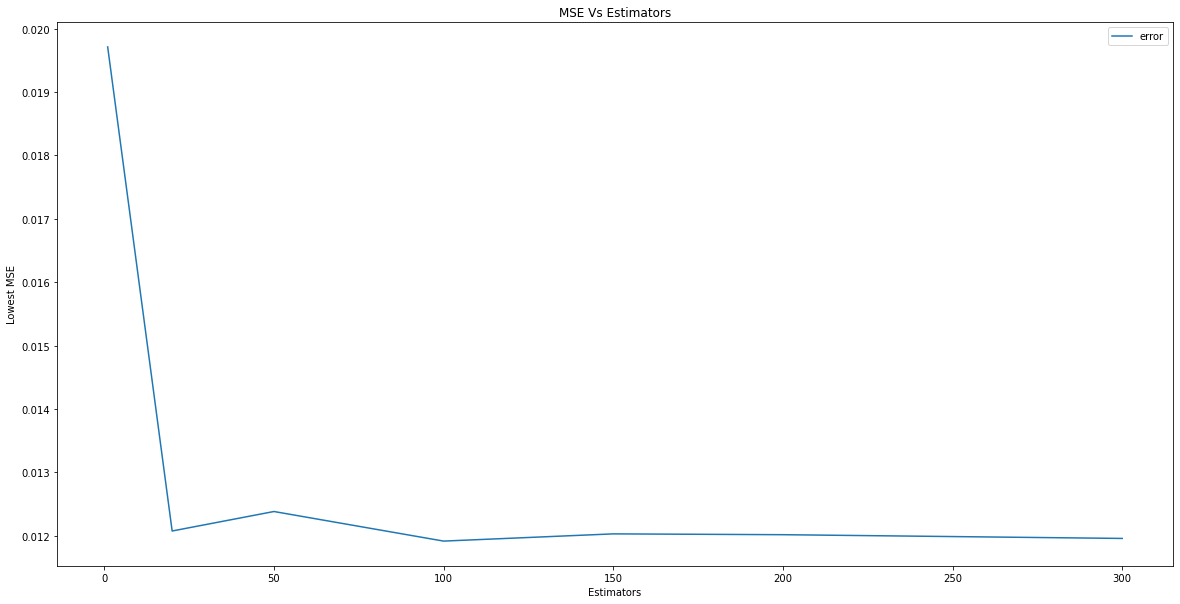

In [15]:
estimators_df = metric_df.groupby(["est"],as_index=False)["error"].min()
estimators_df.plot(x="est",y="error",kind="line",figsize=(20,10))
plt.xlabel("Estimators")
plt.ylabel("Lowest MSE")
plt.title("MSE Vs Estimators")
plt.show()

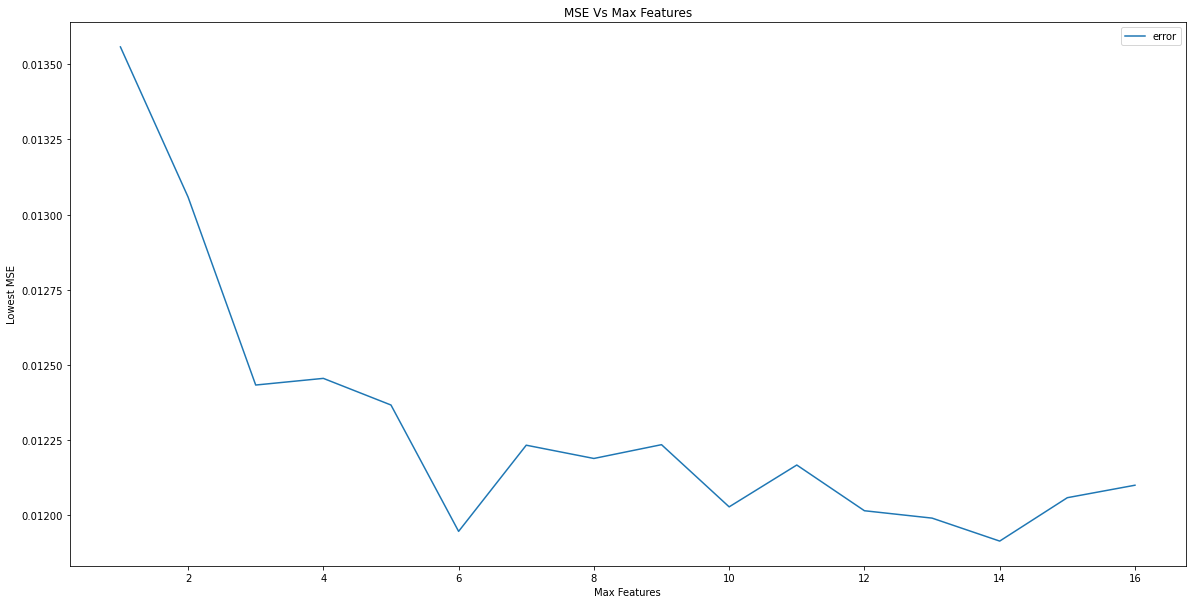

In [17]:
max_features_df = metric_df.groupby(["max_features"],as_index=False)["error"].min()
max_features_df.plot(x="max_features",y="error",kind="line",figsize=(20,10))
plt.xlabel("Max Features")
plt.ylabel("Lowest MSE")
plt.title("MSE Vs Max Features")
plt.show()

From the above plots we can see the relationship between the Error and Number of estimators and the error and max features:<br>
Error and Number of estimators: Error generally decreases as the number of estimators increase though it shows sum irregular behaviour for some values of number of estimators.<br>
Error and max features : The error varies irregularly with man_features selected.


Using gridsearchCV to get the best value of both parameters:

In [224]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regr = RandomForestRegressor(random_state=0)

parameters = {'n_estimators':[i for i in range(1,10)], 'max_features':[i for i in range(1,x_train.shape[1]+1)]}
model = GridSearchCV(regr, parameters)
clf = model.fit(x_train,y_train.values.flatten())
print(clf.best_estimator_)



RandomForestRegressor(max_features=15, n_estimators=9, random_state=0)


In [227]:
regr = RandomForestRegressor(max_features=15, n_estimators=9, random_state=0)
regr = regr.fit(x_train,y_train.values.flatten())
y_pred1 = regr.predict(x_test)
# The root mean squared error
print("Mean squared error: " ,(mean_squared_error(y_test, y_pred1)))


Mean squared error:  0.016902128339591288


In [229]:
feature_importances = clf.best_estimator_.feature_importances_

In [230]:
importance_df = pd.DataFrame(feature_importances)
importance_df.columns = ["Feature Importances"]
importance_df["Features"] = list(x_train.columns)
importance_df = importance_df[["Features","Feature Importances"]]
importance_df = importance_df.sort_values(["Feature Importances"],ascending=False)
display(importance_df)

,Features,Feature Importances
3,Top25perc,0.206493
2,Top10perc,0.203985
6,Outstate,0.094143
15,Grad.Rate,0.080539
4,F.Undergrad,0.053693
8,Books,0.041220
5,P.Undergrad,0.039726
7,Room.Board,0.039471
10,PhD,0.039007
12,S.F.Ratio,0.038935


### Problem 4
In this problem, you will implement the random forest algorithm. The
data set for this assignment is the Palmer Archipelago (Antarctica) penguin data from Kaggle
repository available at here. Split the original data into 80% for training and 20% for testing
(chosen at random).

In [232]:
p_data1 = pd.read_csv('F:\DS5220 - SML\PS3 solution\penguins_size.csv')
p_data21 = pd.read_csv('F:\DS5220 - SML\PS3 solution\penguins_lter.csv')
p_data2 = p_data21[['Clutch Completion', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']] 
p_data = pd.concat([p_data1,p_data2],axis = 1)

In [233]:
p_data.dropna(inplace = True)
#display(p_data.groupby(['species']).count())
p_data['species'].replace(['Adelie', 'Chinstrap','Gentoo'],[0, 1, 2], inplace=True)
#p_data = p_data.drop(['Comments','Date Egg','Individual ID','Stage','Region','Sample Number'], axis=1)
p_data = pd.get_dummies(p_data)
p_data = p_data.drop(['island_Torgersen','sex_.','sex_FEMALE','Clutch Completion_No'], axis=1)

# insurance_data =  insurance_data.rename(columns={'sex_male':'sex','smoker_yes':'smoker'})
display(p_data)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Delta 15 N (o/oo),Delta 13 C (o/oo),island_Biscoe,island_Dream,sex_MALE,Clutch Completion_Yes
1,0,39.5,17.4,186.0,3800.0,8.94956,-24.69454,0,0,0,1
2,0,40.3,18.0,195.0,3250.0,8.36821,-25.33302,0,0,0,1
4,0,36.7,19.3,193.0,3450.0,8.76651,-25.32426,0,0,0,1
5,0,39.3,20.6,190.0,3650.0,8.66496,-25.29805,0,0,1,1
6,0,38.9,17.8,181.0,3625.0,9.18718,-25.21799,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0,7.99184,-26.20538,1,0,0,0
340,2,46.8,14.3,215.0,4850.0,8.41151,-26.13832,1,0,0,1
341,2,50.4,15.7,222.0,5750.0,8.30166,-26.04117,1,0,1,1
342,2,45.2,14.8,212.0,5200.0,8.24246,-26.11969,1,0,0,1


In [41]:
# y = p_data[['species']]
# x = p_data.drop(['species'], axis=1)
# x_train, x_test,y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)

In [234]:
train_data, test_data = train_test_split(p_data,train_size=0.8,test_size=0.2)

In [235]:
train_data

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Delta 15 N (o/oo),Delta 13 C (o/oo),island_Biscoe,island_Dream,sex_MALE,Clutch Completion_Yes
120,0,36.2,17.2,187.0,3150.0,9.04296,-26.19444,0,0,0,0
154,1,51.3,19.2,193.0,3650.0,9.29078,-24.75570,0,1,1,1
323,2,49.1,15.0,228.0,5500.0,8.65914,-25.79203,1,0,1,1
169,1,58.0,17.8,181.0,3700.0,9.14382,-24.57994,0,1,0,0
159,1,51.3,18.2,197.0,3750.0,8.63701,-24.84059,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
101,0,41.0,20.0,203.0,4725.0,9.01079,-26.38085,1,0,1,1
209,1,49.3,19.9,203.0,4050.0,9.88809,-24.59513,0,1,1,1
64,0,36.4,17.1,184.0,2850.0,8.62623,-26.11650,1,0,0,1
70,0,33.5,19.0,190.0,3600.0,7.88863,-26.63085,0,0,0,1


**(a)** Begin by creating a bootstrap sample of size 1000 and then select a subset of p
columns. Vary the value of p and report the p that results in the lowest cross-validation error.
Now train a decision tree classifier on the bootstrap sample by setting the depth to 6. (Hint:
You may want to use DecisionTreeClassifier() in sklearn.tree() to fit each tree. Refer
to class notes and some suggested values to choose the value of p.)


In [236]:
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0,max_depth = 6)
SelectedColumns=[]
resultScores = []
for i in range(1,11):
    CVscores = []
    bootstrap_df = resample(train_data,replace = True,n_samples = 100)
    Y = bootstrap_df[['species']]
    x = bootstrap_df.drop(['species'], axis=1)
    X = x.sample(n=i,axis='columns')
    SelectedColumns.append(list(X.columns))
    CVscores.append(cross_val_score(clf, X, Y, cv=10, scoring = 'accuracy'))
    finalscrs = (np.mean(CVscores))
    resultScores.append(finalscrs)
result_df = pd.DataFrame({'P': [i for i in range(1,11)] ,
                          'Selected features': SelectedColumns,
                          'Accuracy':resultScores,
                          'Error': [1-n for n in resultScores]})
display(result_df)


,P,Selected features,Accuracy,Error
0,1,[culmen_length_mm],0.79,0.21
1,2,"[culmen_depth_mm, sex_MALE]",0.78,0.22
2,3,"[island_Dream, island_Biscoe, flipper_length_mm]",0.86,0.14
3,4,"[Delta 15 N (o/oo), culmen_length_mm, island_D...",0.97,0.03
4,5,"[island_Biscoe, flipper_length_mm, Delta 13 C ...",0.95,0.05
5,6,"[body_mass_g, Clutch Completion_Yes, island_Dr...",0.92,0.08
6,7,"[Delta 15 N (o/oo), island_Dream, Delta 13 C (...",0.95,0.05
7,8,"[Delta 13 C (o/oo), flipper_length_mm, Clutch ...",0.96,0.04
8,9,"[island_Dream, sex_MALE, island_Biscoe, culmen...",0.94,0.06
9,10,"[island_Biscoe, island_Dream, Delta 15 N (o/oo...",0.89,0.11


In [237]:
result_df[result_df['Error'] == result_df['Error'].min()]

,P,Selected features,Accuracy,Error
3,4,"[Delta 15 N (o/oo), culmen_length_mm, island_D...",0.97,0.03


From the above results we can see that the best values for P is 4.

**(b)** Repeat the above step to generate T ∈ {1, 50, 100, 150, 200, 300, 400} trees and
evaluate on your training set. Combine the predictions from all trees and assign the final
class based on a majority vote of the predictions of every tree. In case of ties, assign a class
randomly among the ties.

In [251]:


def execute_forrest(train_data,test_data,num_trees,p):
    data_rows=test_data.shape[0]
    arr = np.empty((0,data_rows), int)
    SelectedColumns=[]
    resultScores = []
    Y_pred_final = []
    X_test = test_data.drop(['species'], axis=1)
    Y_test = test_data[['species']]    
    X_train = train_data.drop(['species'], axis=1)
    Y_train = train_data[['species']]    
    #print(arr)
    for i in range(1,num_trees+1):
        CVscores = []
        x,Y = resample(X_train,Y_train,replace = True,n_samples = 100)
        X = x.sample(n=p,axis='columns')
        selectedFeatures = list(X.columns)
        clf = DecisionTreeClassifier(random_state=0,max_depth = 6)
        tree = clf.fit(X,Y)
        Y_pred = tree.predict(X_test[selectedFeatures])
        Y_pred_rows, Y_pred_cols = Y_pred.reshape(-1,1).shape
        Y_app = Y_pred.reshape(1,Y_pred_rows)
        arr = np.append(arr, Y_app, axis=0)
    #print(arr)
    res_arr = np.transpose(arr)
    for row in res_arr:
        #print(row)
        uniq, cnts = np.unique(row, return_counts=True)
        max_cnt = np.max(cnts)
        ties = uniq[cnts==max_cnt]
        Y_pred_final.append(np.random.choice(ties))
        
    return(Y_pred_final)

#print(execute_forrest(train_data,train_data,1,6))

[0, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0]


In [282]:
Y_train = list(train_data['species'])
T = [1, 50, 100, 150, 200, 300, 400]
Scores = []

for i in T:
    Y_pred_forrest = execute_forrest(train_data,train_data,i,3)
    Scores.append(accuracy_score(Y_train, Y_pred_forrest))
df = pd.DataFrame({'Num_of_Trees':T,'Accuracy':Scores,'Train Error':[1-n for n in Scores]})
display(df)




,Num_of_Trees,Accuracy,Train Error
0,1,0.934615,0.065385
1,50,1.000000,0.000000
2,100,1.000000,0.000000
3,150,0.996154,0.003846
4,200,0.996154,0.003846
5,300,1.000000,0.000000
6,400,1.000000,0.000000


**(c)** Report the training and test error, F1 score, and AUC by varying T in the range
{1, 50, 100, 150, 200, 300, 400}

Since F1 and AUC metrics are used to quantify binary classifications, and in this case we have three classes, so scores need to be calculated separately for every class. (refer to the following user defined fucntions for calculation of F1 and AUC scores).

In [258]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

def auc_calc(y_pred,y_actual):

    auc_list = []
    enc = OneHotEncoder()
    
    y_pred_df = pd.DataFrame({'predictions':y_pred})
    pred = pd.DataFrame(enc.fit_transform(y_pred_df).toarray())

    y_actual_df = pd.DataFrame({'actual':y_actual})
    res = pd.DataFrame(enc.fit_transform(y_actual_df).toarray())

    for col in pred:
        auc = round(roc_auc_score(list(res[col]),list(pred[col])),3)
        auc_list.append(auc)
    
    return(auc_list)




In [278]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

def f1_calc(y_pred,y_actual):

    f1_list = []    
    f1score = f1_score(y_actual,y_pred,average = None)
    f1score = [round(x,3) for x in f1score]
    f1_list.append(f1score)
    return(f1_list)




Reporting Error, F1 scores and AUC on training data.

In [294]:
Y_train = list(train_data['species'])
T = [1, 50, 100, 150, 200, 300, 400]
Scores = []
AucScores=[]
F1Scores=[]
for i in T:
    Y_pred_forrest = execute_forrest(train_data,train_data,i,3)
    Scores.append(accuracy_score(Y_train, Y_pred_forrest))
    AucScores.append(auc_calc(Y_pred_forrest,Y_train))
    F1Scores.append(f1_calc(Y_pred_forrest,Y_train))
    
df = pd.DataFrame({'Num_of_Trees':T,'Accuracy':Scores,'Train Error':[1-n for n in Scores],'F1 Scores':F1Scores,'AUC':AucScores})
display(df)
    

,Num_of_Trees,Accuracy,Train Error,F1 Scores,AUC
0,1,0.953846,0.046154,"[[0.954, 0.903, 0.984]]","[0.965, 0.925, 0.986]"
1,50,1.000000,0.000000,"[[1.0, 1.0, 1.0]]","[1.0, 1.0, 1.0]"
2,100,0.996154,0.003846,"[[0.995, 0.992, 1.0]]","[0.995, 0.998, 1.0]"
3,150,0.992308,0.007692,"[[0.991, 0.983, 1.0]]","[0.992, 0.989, 1.0]"
4,200,0.996154,0.003846,"[[0.995, 0.991, 1.0]]","[0.997, 0.992, 1.0]"
5,300,1.000000,0.000000,"[[1.0, 1.0, 1.0]]","[1.0, 1.0, 1.0]"
6,400,0.996154,0.003846,"[[0.995, 0.992, 1.0]]","[0.995, 0.998, 1.0]"


Reporting Error, F1 scores and AUC on test data.

In [290]:
from sklearn.metrics import f1_score
Y_train = list(train_data['species'])
Y_test = list(test_data['species'])
T = [1, 50, 100, 150, 200, 300, 400]
TrainScores = []
TestScores = []
F1Scores = []
AucScores=[]

for i in T:
    Y_pred_forrest = execute_forrest(train_data,train_data,i,3)
    TrainScores.append(accuracy_score(Y_train, Y_pred_forrest))
    Y_pred_forrest = execute_forrest(train_data,test_data,i,3)
    TestScores.append(accuracy_score(Y_test, Y_pred_forrest))
    AucScores.append(auc_calc(Y_pred_forrest,Y_test))
    F1Scores.append(f1_calc(Y_pred_forrest,Y_test))
df = pd.DataFrame({'Num_of_Trees':T,'Train Error':[1-n for n in TrainScores],'Test Error':[1-n for n in TestScores],'F1 Score':F1Scores,'AUC':AucScores})
display(df)


,Num_of_Trees,Train Error,Test Error,F1 Score,AUC
0,1,0.073077,0.061538,"[[0.952, 0.842, 0.958]]","[0.955, 0.974, 0.967]"
1,50,0.007692,0.015385,"[[0.985, 0.941, 1.0]]","[0.985, 0.991, 1.0]"
2,100,0.000000,0.030769,"[[0.969, 0.889, 1.0]]","[0.97, 0.982, 1.0]"
3,150,0.003846,0.000000,"[[1.0, 1.0, 1.0]]","[1.0, 1.0, 1.0]"
4,200,0.000000,0.000000,"[[1.0, 1.0, 1.0]]","[1.0, 1.0, 1.0]"
5,300,0.000000,0.015385,"[[0.985, 0.941, 1.0]]","[0.985, 0.991, 1.0]"
6,400,0.000000,0.000000,"[[1.0, 1.0, 1.0]]","[1.0, 1.0, 1.0]"


**(d)** Use an existing package to train a Random Forest algorithm with 10, 50, and
100 decision trees. Report similar metrics on both the training and testing sets. Report the top 10 features having the most influence on the model. (Hint: You may find
RandomForestClassifier() in the sklearn.ensemble library useful.)


In [299]:
from sklearn.ensemble import RandomForestClassifier
T = [10,50,100]
X_train = train_data.drop(['species'], axis=1)
Y_train = train_data[['species']]
Y_train_lst = list(train_data['species'])
X_test = test_data.drop(['species'], axis=1)
Y_test = list(test_data['species'])
TrainScores = []
TestScores = []
F1Scores = []
AucScores=[]

for i in T:
    clf = RandomForestClassifier(n_estimators=i, max_depth=6, random_state=40)
    clf.fit(X_train,Y_train.values.flatten())
    
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    TrainScores.append(accuracy_score(Y_train, Y_pred_train))
    TestScores.append(accuracy_score(Y_test, Y_pred_test))
    AucScores.append(auc_calc(Y_pred_test,Y_test))
    F1Scores.append(f1_calc(Y_pred_test,Y_test))
    
    #feature importances
    feature_importances = clf.feature_importances_
    importance_df = pd.DataFrame(feature_importances)
    importance_df.columns = ["Feature Importances"]
    importance_df["Features"] = list(X_train.columns)
    importance_df = importance_df[["Features","Feature Importances"]]
    importance_df = importance_df.sort_values(["Feature Importances"],ascending=False)


df = pd.DataFrame({'Num_of_Trees':T,'Train Error':[1-n for n in TrainScores],'Test Error':[1-n for n in TestScores],'F1 Score':F1Scores,'AUC':AucScores})

display(df)

display(importance_df)


,Num_of_Trees,Train Error,Test Error,F1 Score,AUC
0,10,0.0,0.015385,"[[0.985, 0.941, 1.0]]","[0.985, 0.991, 1.0]"
1,50,0.0,0.015385,"[[0.985, 0.941, 1.0]]","[0.985, 0.991, 1.0]"
2,100,0.0,0.015385,"[[0.985, 0.941, 1.0]]","[0.985, 0.991, 1.0]"


,Features,Feature Importances
0,culmen_length_mm,0.236742
2,flipper_length_mm,0.169142
1,culmen_depth_mm,0.159438
5,Delta 13 C (o/oo),0.159241
3,body_mass_g,0.095413
7,island_Dream,0.064665
6,island_Biscoe,0.060572
4,Delta 15 N (o/oo),0.048808
8,sex_MALE,0.003769
9,Clutch Completion_Yes,0.002210


### Problem 5

In this problem, we will look inside the neural network architecture
for a multi-layer linear neural net and show that it collapses to a single linear layer. Consider a
feed forward neural network with one hidden layer as shown below. A linear activation function
σ(z) = cz is used at the hidden nodes while the output node uses the sigmoid activation function
$ σ′(z) = \dfrac {1}{1 + e^{−z}} $
to learn the function for P(y = 1|x, w) where x = $(x_1, x_2)$ and w = $(w_1, w_2, . . . , w_9)$.
See Figure 1 for an illustration.

**(a)** What is the output P(y = 1|x, w) from the above neural net? Express it in terms
of xi
, c and weights wi
. What kind of final classification boundary does this yield?

The given neural network has two input neurons with inputs x1,x2 <br>   
Two Hidden layers with linear activation function $\sigma(z)$, which is given by <br>
$$\sigma(z) = cz$$
Let the two nodes be H1 and H2.
From the given neural network it can be observed that the incoming weights from input layers are weights w3,w4,w5,w6 respectively.<br>
Taking into account the bias represented by neuron with magnitude 1 and weights w1,w2 the Hidden layers can be represented as:
<br>
H1 = $\sigma(w1 + w3x1 + w5x2)$<br>
H1 = $c(w1 + w3x1 + w5x2)$<br>

H2 = $\sigma(w2+ w4x1 + w6x2)$<br>
H2 = $c(w2+ w4x1 + w6x2)$<br>

Similarly, for the output neuron, let it be O:<br>
$O = w7 + H1w8 +H2w9$<br>
$O = w7 + cw8(w1 + w3x1 + w5x2) + cw9(w2+ w4x1 + w6x2)$<br>
$O = (w7 + cw8w1 + cw9w2) + (cw8w3+cw9w2)x1 + (cw8w5 + cw9w6)x2$ <br>
$P(y=1) = \dfrac {1}{1 + e^{−z}}$<br>
$P(y=1) = \dfrac {1}{1 + e^{(w7 + cw8w1 + cw9w2) + (cw8w3+cw9w2)x1 + (cw8w5 + cw9w6)x2}}$<br>

To calculate classification boundary:<br>

$P(y=1) = 0.5$<br>
$\dfrac {1}{1 + e^{−z}} = 0.5$<br>
$ \implies z = 0$<br>
The classification boundary (interms of x):<br>
$(w7 + cw8w1 + cw9w2) + (cw8w3+cw9w2)x1 + (cw8w5 + cw9w6)x2 = 0$<br>




**(b)**  Draw a neural net without any hidden nodes such that its output is equivalent to
that of the given neural net. Write the weights ˜w of this new neural net in terms of c and wi
.
Is it true that any multi-layered neural network with linear activation functions at hidden
layers can be represented as a neural net without any hidden layer? Explain your answer

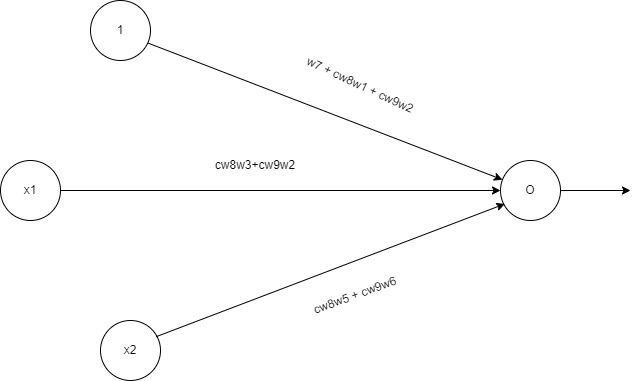

In [306]:
from PIL import Image
img = Image.open('F:\\DS5220 - SML\\PS3 solution\\Neuralnets.jpg')
img

Here, the new weights be W1, W2, W3 are given as follows:<br>
W1 = w7 + cw8w1 + cw9w2<br>
W2 = cw8w3 + cw9w2<br>
W3 = cw8w5 + cw9w6<br>
output neuron O is represented as = O(W1 + W2x1 + W3x2)

Yes, A multi-layered neural network with linear activation functions at hidden layers can be represented as a neural net without any hidden layer.


Because if linear activation functions are used for the hidden neurons then the output neuron can be represented as a linear combination of the activation function of hidden layers. Moreover,since these intermediate layer outputs serves as inputs
to the final output layer, we can always represent the neural network as a network which does not have any
hidden layer as can be observed in the explaination (and figure) above.(refer to part a)